#### Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#### Mounting Dataset

In [ ]:
from google.colab import drive                  # Mounting google drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls

drive  sample_data


In [ ]:
# change directory

import os
os.chdir("drive/MyDrive/PERI GIGI")

In [ ]:
!ls

#### Reading dataset

In [ ]:
from PIL import Image
import os

# Path ke direktori dataset
dataset_dir = '/content/drive/MyDrive/PERI GIGI/train/gigi sehat'

# Ukuran target gambar yang diinginkan
target_size = (150, 150)

# Membaca gambar-gambar dalam dataset dan melakukan resize
images = []
labels = []

# Loop melalui setiap file dalam direktori dataset
for filename in os.listdir(dataset_dir):
    if filename.endswith('.jpg') or filename.endswith('.png'):  # Memeriksa ekstensi file
        file_path = os.path.join(dataset_dir, filename)
        label = filename.split('_')[0]  # Misalnya, label diambil dari nama file sebelum tanda '_'
        image = Image.open(file_path)
        image = image.resize(target_size)  # Melakukan resize pada gambar
        images.append(image)
        labels.append(label)

# Melihat contoh gambar dan label
for image, label in zip(images, labels):
    image.show()  # Menampilkan gambar
    print(label)  # Menampilkan label


In [ ]:
gigi_sehat_train = len(os.listdir("/content/drive/MyDrive/PERI GIGI/train/gigi sehat"))

gigi_sehat_test = len(os.listdir("/content/drive/MyDrive/PERI GIGI/test/gigi sehat"))

#================================================================================================

gigi_tak_sehat_train = len(os.listdir("/content/drive/MyDrive/PERI GIGI/train/gigi tak sehat"))

gigi_tak_sehat_test = len(os.listdir("/content/drive/MyDrive/PERI GIGI/test/gigi tak sehat"))

print(f"data train gigi sehat adalah {gigi_sehat_train}\ndata test gigi sehat adalah {gigi_sehat_test}\ndata train gigi tak sehat adalah {gigi_tak_sehat_train}\ndata test gigi tak sehat adalah {gigi_tak_sehat_test}")

data train gigi sehat adalah 722
data test gigi sehat adalah 180
data train gigi tak sehat adalah 720
data test gigi tak sehat adalah 180


Train Generator 

In [ ]:
# membuat training generator

train_generator = ImageDataGenerator(rescale = 1/255,
                                     horizontal_flip=True,
                                     vertical_flip=True,
                                     rotation_range=60,
                                     zoom_range=0.3,
                                     fill_mode='nearest')

# Membuat training data generator

train_data = train_generator.flow_from_directory('/content/drive/MyDrive/PERI GIGI/train',
                                                 target_size=(150,150),
                                                 batch_size=16,
                                                 class_mode='binary')

Found 1440 images belonging to 2 classes.


In [ ]:
# Membuat validation data generator

val_generator = ImageDataGenerator(rescale=1/255)

val_data = val_generator.flow_from_directory('/content/drive/MyDrive/PERI GIGI/test',
                                                 target_size=(150,150),
                                                 batch_size=8,
                                                 class_mode='binary')

Found 360 images belonging to 2 classes.


In [ ]:
image_batch_train, label_batch_train = next(train_data)
print("Image batch shape: ", image_batch_train.shape)
print("Label batch shape: ", label_batch_train.shape)

dataset_labels = sorted(train_data.class_indices.items(), key=lambda pair: pair[1])
dataset_labels = np.array([key.title() for key, value in dataset_labels])
print(dataset_labels)

Image batch shape:  (16, 150, 150, 3)
Label batch shape:  (16,)
['Gigi Sehat' 'Gigi Tak Sehat']


In [ ]:
for image_batch, labels_batch in train_data:
  print(image_batch.shape)
  print(labels_batch.shape)
  break


for image_batch2, labels_batch2 in val_data:
  print(image_batch2.shape)
  print(labels_batch2.shape)
  break

(16, 150, 150, 3)
(16,)
(8, 150, 150, 3)
(8,)


Buld The Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

model = tf.keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

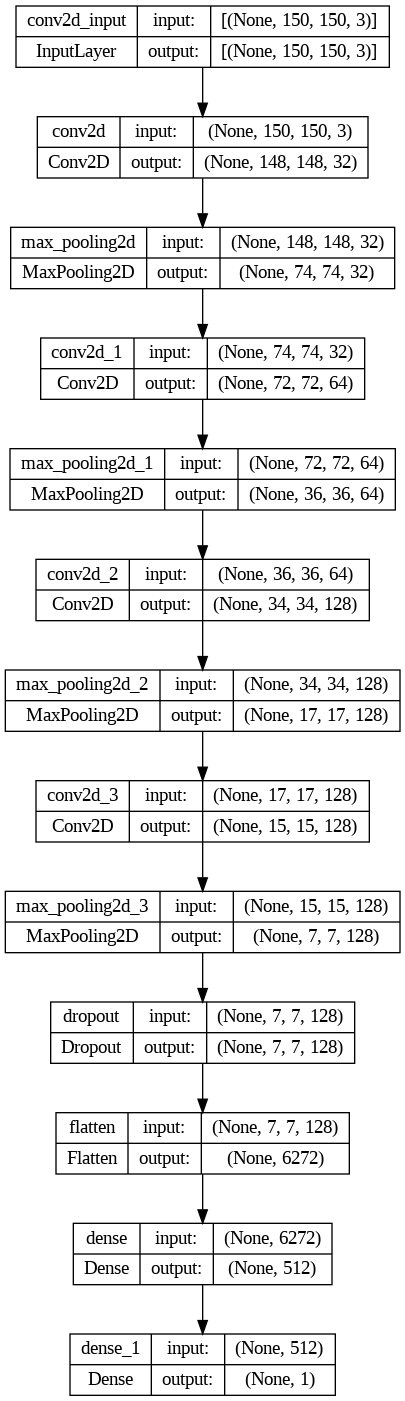

In [ ]:
model.summary()
tf.keras.utils.plot_model(model, to_file='model.png',show_shapes=True)

Compile The Model 

In [ ]:
# Compile Model

from tensorflow.keras.optimizers import Adam
#model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.compile(optimizer=Adam(learning_rate=0.00001),loss='binary_crossentropy', metrics=['accuracy'])

total_params = model.count_params()
print("Total trainable parameters: ", total_params)

"""
model.compile(optimizer=Adam(learning_rate=0.0001,
beta_1=0.9,
beta_2=0.999,
epsilon=1e-07,
amsgrad=False,
weight_decay=None,
clipnorm=None,
clipvalue=None,
global_clipnorm=None,
use_ema=False,
ema_momentum=0.99,
ema_overwrite_frequency=None,),
loss='binary_crossentropy', metrics=['accuracy'])
"""

Total trainable parameters:  3453121


"\nmodel.compile(optimizer=Adam(learning_rate=0.0001,\nbeta_1=0.9,\nbeta_2=0.999,\nepsilon=1e-07,\namsgrad=False,\nweight_decay=None,\nclipnorm=None,\nclipvalue=None,\nglobal_clipnorm=None,\nuse_ema=False,\nema_momentum=0.99,\nema_overwrite_frequency=None,),\nloss='binary_crossentropy', metrics=['accuracy'])\n"

Train The Model 

In [16]:
#Train Model 

history = model.fit(train_data,
                    steps_per_epoch= 57,
                    epochs= 1000,
                    validation_data= val_data,
                    validation_steps= 45,
                    verbose= 1)

Epoch 1/1000
57/57 [==============================] - 526s 9s/step - loss: 0.6879 - accuracy: 0.5318 - val_loss: 0.6857 - val_accuracy: 0.5028
Epoch 2/1000
57/57 [==============================] - 125s 2s/step - loss: 0.6752 - accuracy: 0.5735 - val_loss: 0.6761 - val_accuracy: 0.5194
Epoch 3/1000
57/57 [==============================] - 44s 785ms/step - loss: 0.6640 - accuracy: 0.6162 - val_loss: 0.6572 - val_accuracy: 0.6833
Epoch 4/1000
57/57 [==============================] - 36s 621ms/step - loss: 0.6456 - accuracy: 0.6809 - val_loss: 0.6368 - val_accuracy: 0.6806
Epoch 5/1000
57/57 [==============================] - 21s 359ms/step - loss: 0.6299 - accuracy: 0.6820 - val_loss: 0.6208 - val_accuracy: 0.6917
Epoch 6/1000
57/57 [==============================] - 18s 315ms/step - loss: 0.6009 - accuracy: 0.7105 - val_loss: 0.6123 - val_accuracy: 0.6806
Epoch 7/1000
57/57 [==============================] - 17s 302ms/step - loss: 0.5960 - accuracy: 0.6809 - val_loss: 0.6510 - val_accura

In [17]:
import time

start_time = time.time()
# Your code goes here
end_time = time.time()
execution_time = end_time - start_time
print(f"Execution time: {execution_time} seconds")

Execution time: 3.528594970703125e-05 seconds


Evaluate The Model 

In [18]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing import image
from google.colab import files

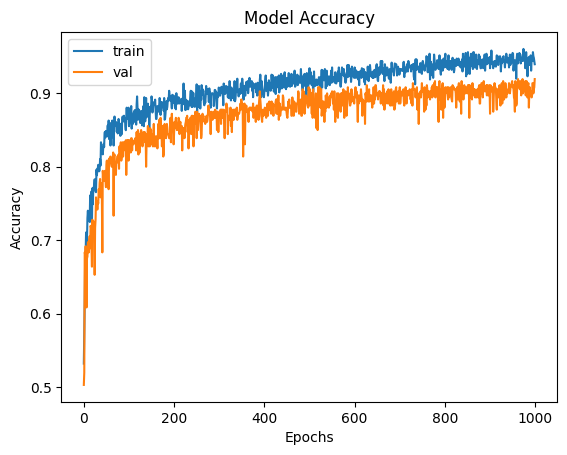

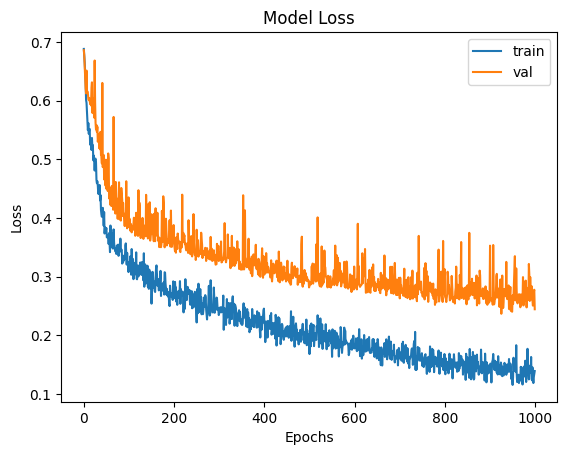

In [19]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])
plt.show()

# 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])
plt.show()

Saving (173).jpg to (173).jpg
1/1 [==============================] - 0s 277ms/step
(173).jpg
gigi tak sehat


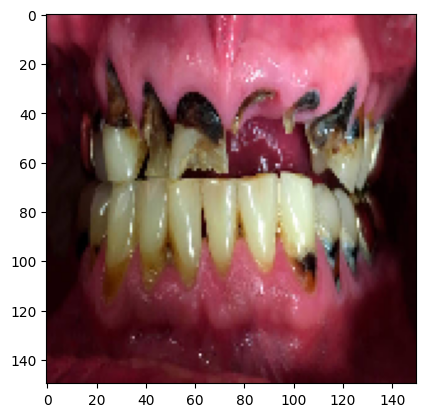

In [20]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing import image
from google.colab import files

%matplotlib inline


uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
 
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  
  classes = model.predict(images, batch_size=16)  
  print(fn)
  if classes==0:
   print('gigi sehat')
  elif classes==1:
   print('gigi tak sehat')
  else:
    print("Silahkan memotret gigi anda dengan benar")

In [22]:
from keras.models import model_from_json
# serialize model to json
json_model = model.to_json()
#save the model architecture to JSON file
with open('model5', 'w') as json_file:
    json_file.write(json_model)

#saving the weights of the model
model.save_weights('model5_weight.h5')

model.save('model5.h5')

In [ ]:
#import tensorflow as tf
  
# Save the model.
#with open('model4.tflite', 'wb') as f:
#  f.write(tflite_model)

NameError: ignored